In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cpymad.madx import Madx
from pybt.tools.plotters import *
from madxtools.plot_tool import *
import requests
from madxtools.air_scattering import *
import ipywidgets as widgets
from ipywidgets import *
from IPython.display import display

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
nominal_optics = [
    0.479688,
    0.21,
    0.19864,
    0.090343,
    0.195989,
    0.194437,
    0.061494,
    0.069052,
]

In [ ]:
E_cin_per_nucleon = 2.0
# Ion properties
A = 208.0
Z = 82.0
N = 126.0
charge = 54.0
m_proton_GeV = 0.93828
m_neutron_GeV = 0.93957
m_electron_GeV = 0.000511
m_u_GeV = 0.9315
mass_defect_GeV = Z * m_proton_GeV + N * m_neutron_GeV + (Z - charge) * m_electron_GeV - A * m_u_GeV
E_0 = Z * m_proton_GeV + N * m_neutron_GeV - mass_defect_GeV

p = E_0 * np.sqrt((((E_cin_per_nucleon * A) / E_0) + 1) ** 2 - 1)

gamma = p/charge/0.938
beta = np.sqrt(1-gamma**(-2))
exn=1.5e-6
eyn=1.5e-6
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

print(p/charge)
print(f"gamma = {round(gamma,3)}")
print(f"beta = {round(beta,3)}")
print(f"p = {round(p/charge,3)} GeV/c")

Brho = 3.33564*p/charge

10.706294697042374
gamma = 11.414
beta = 0.996
p = 10.706 GeV/c


ex = 2.23e-06
ey = 6.10e-07


/Users/eliottjohnson/miniforge3/envs/xsuite-arm/lib/python3.11/site-packages/madxtools/plot_tool.py:168: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].set_xlim(0,twiss.s[-1])
/Users/eliottjohnson/miniforge3/envs/xsuite-arm/lib/python3.11/site-packages/madxtools/plot_tool.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[2].set_xlim(0,twiss.s[-1])
/Users/eliottjohnson/miniforge3/envs/xsuite-arm/lib/python3.11/site-packages/madxtools/plot_tool.py:184: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wi

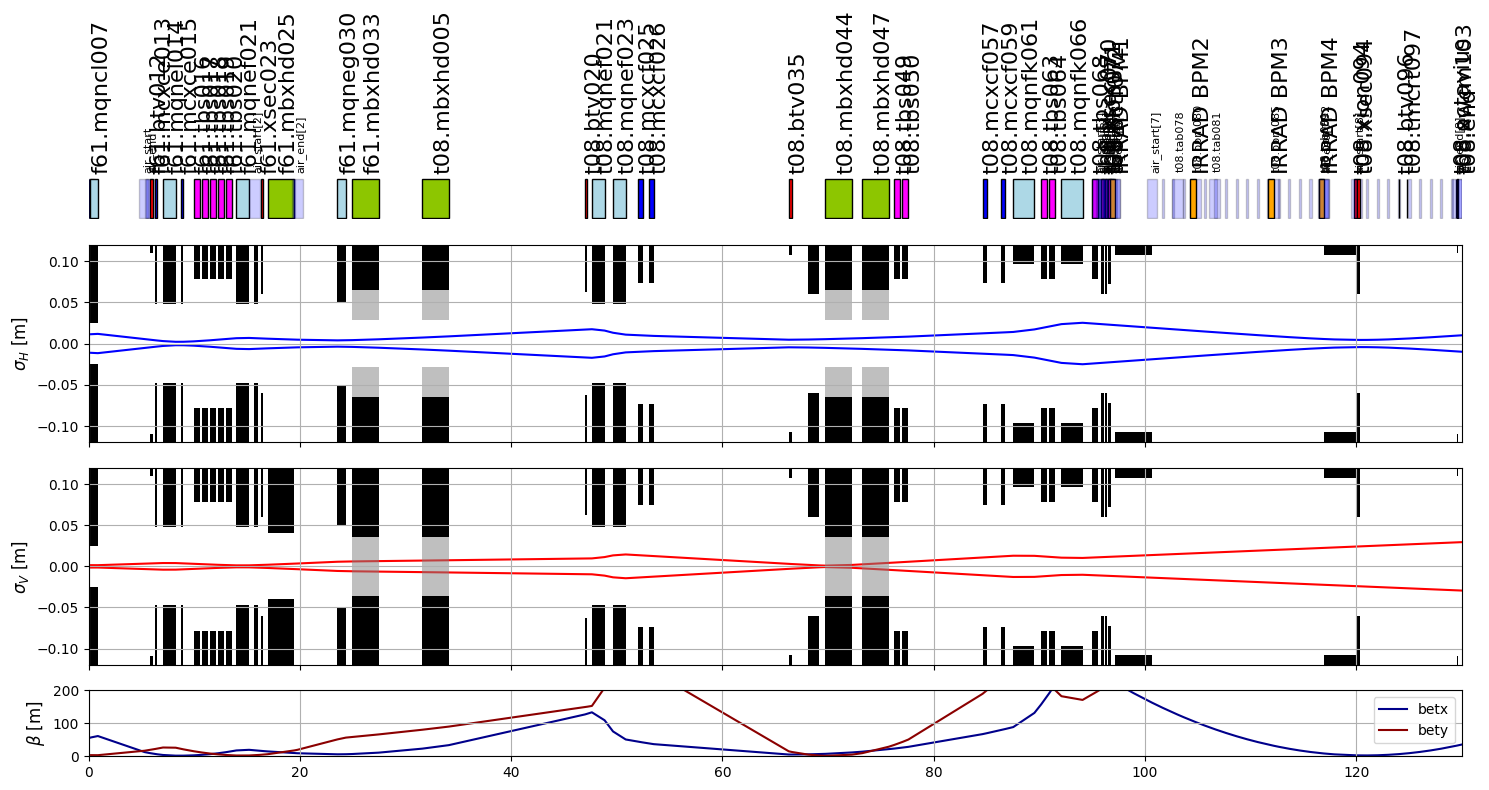

In [ ]:
# Matched initial parameters 13nd oct 2023
betx0 = 53.074
alfx0 = -13.191
dx0 = 0.13
dpx0 = 0.02
exn = 2.53e-5

bety0 = 3.675
alfy0 = 0.859
dy0 = 0.0
dpy0 = 0.0
eyn = 6.94e-06

sige = 0.0045

ex = exn/(beta*gamma)
ex_initial = ex
print(f"ex = {ex_initial:.2e}")
ey = eyn/(beta*gamma)
ey_initial = ey
print(f"ey = {ey_initial:.2e}")

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

# Optics
optics = nominal_optics
madx.input("kQFN1 = "+str(optics[0])+";")
madx.input("kQDN2 = "+str(-optics[1])+";")
madx.input("kQFN3 = "+str(optics[2])+";")
madx.input("kQDN4 = "+str(-optics[3])+";")
madx.input("kQFN5 = "+str(optics[4])+";")
madx.input("kQDN6 = "+str(-optics[5])+";")
madx.input("kQDN7 = "+str(-optics[6])+";")
madx.input("kQFN8 = "+str(optics[7])+";")

# Add the Air region
sequence = "f61t8_op"

p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

#t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


# add_hidden_marker(madx, sequence, 20, 100, steps)

madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
madx.use(sequence=sequence)

# make thin
madx.use(sequence="f61t8_op")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')
madx.use(sequence="f61t8_op")
madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
# madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")
madx.use(sequence="f61t8_op")


twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])


In [ ]:
# Largest beam size
import scipy.optimize as optimize

instrument_focal_point = "t08.tab078"

def f_focal_at_location(params):
    k_QFN1, k_QDN2, k_QFN3, k_QDN4, k_QFN5, k_QDN6, k_QDN7, k_QFN8 = params

    print(params)
    madx.input("kQFN1 = "+str(k_QFN1)+";")
    madx.input("kQDN2 = "+str(-k_QDN2)+";")
    madx.input("kQFN3 = "+str(k_QFN3)+";")
    madx.input("kQDN4 = "+str(-k_QDN4)+";")
    madx.input("kQFN5 = "+str(k_QFN5)+";")
    madx.input("kQDN6 = "+str(-k_QDN6)+";")
    madx.input("kQDN7 = "+str(-k_QDN7)+";")
    madx.input("kQFN8 = "+str(k_QFN8)+";")

    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

    penality = 0
    loc_check_aper1 = (twiss.aper_1 != 0) & (twiss.s <= 70)
    loc_check_aper2 = (twiss.aper_2 != 0) & (twiss.s <= 70)
    if ( any(val < 0 for val in twiss.loc[loc_check_aper1].aper_1 - beam_size(twiss.loc[loc_check_aper1]['betx'], twiss.loc[loc_check_aper1]['dx'], ex, sige, 2)) == True): # Only do the check were you have aperture data
        print ("Touching aperture H")
        penality = 1e0
    if ( any(val < 0 for val in twiss.loc[loc_check_aper2].aper_2 - beam_size(twiss.loc[loc_check_aper2]['bety'], twiss.loc[loc_check_aper2]['dy'], ey, sige, 2)) == True):
        print ("Touching aperture V")
        penality = 1e0
    if ( any(val < 0 for val in twiss.loc[loc_check_aper1].aper_1 - beam_size(twiss.loc[loc_check_aper1]['bety'], twiss.loc[loc_check_aper1]['dy'], ey, sige, 2)) == True):
        print ("Touching aperture V")
        penality = 1e0
        
    # Target beam size
    x_beam_size = beam_size(twiss['betx'][instrument_focal_point], twiss['dx'][instrument_focal_point], ex, sige, 1)
    y_beam_size = beam_size(twiss['bety'][instrument_focal_point], twiss['dy'][instrument_focal_point], ey, sige, 1)

    # Beam size for transport
    loc_to_minimize = (twiss.s <= 76)
    x_beam_size_to_min = beam_size(twiss.loc[loc_to_minimize]['betx'], twiss.loc[loc_to_minimize]['dx'], ex, sige, 1)
    y_beam_size_to_min = beam_size(twiss.loc[loc_to_minimize]['bety'], twiss.loc[loc_to_minimize]['dy'], ey, sige, 1)

    objective = -(x_beam_size) + -(y_beam_size) + penality  + (np.abs(x_beam_size-y_beam_size))
    print (objective)
    return objective


initial_guess = [0.478651, 0.17, 0.197, 0.090441, 0.194148, 0.194148, 0.0611, 0.0687]
result = optimize.minimize(f_focal_at_location, initial_guess, bounds = [(0,0.53823),(0,0.221974),(0,0.215518),(0,0.103435),(0,0.219329),(0,0.219329),(0,0.104392),(0,0.109391)], method="Nelder-Mead",options={"maxiter": 10000}) # options={"maxiter": 10}
if result.success:
    fitted_params_focal_mwpc = result.x
    print(fitted_params_focal_mwpc)
else:
    raise ValueError(result.message)

[0.478651 0.17     0.197    0.090441 0.194148 0.194148 0.0611   0.0687  ]
-0.01937980024359726
[0.50258355 0.17       0.197      0.090441   0.194148   0.194148
 0.0611     0.0687    ]
-0.018842015084772505
[0.478651 0.1785   0.197    0.090441 0.194148 0.194148 0.0611   0.0687  ]
-0.01956884812111579
[0.478651 0.17     0.20685  0.090441 0.194148 0.194148 0.0611   0.0687  ]
-0.02021923311059392
[0.478651   0.17       0.197      0.09496305 0.194148   0.194148
 0.0611     0.0687    ]
-0.018297070977770696
[0.478651  0.17      0.197     0.090441  0.2038554 0.194148  0.0611
 0.0687   ]
-0.01782045378499538
[0.478651  0.17      0.197     0.090441  0.194148  0.2038554 0.0611
 0.0687   ]
-0.022882282591922695
[0.478651 0.17     0.197    0.090441 0.194148 0.194148 0.064155 0.0687  ]
-0.0170923996768551
[0.478651 0.17     0.197    0.090441 0.194148 0.194148 0.0611   0.072135]
-0.020385505609127094
[0.48463414 0.172125   0.1994625  0.09157151 0.19657485 0.19657485
 0.058045   0.06955875]
-0.022171

In [ ]:
madx.input(f"kQFN1 = {result.x[0]};")
madx.input(f"kQDN2 = {-result.x[1]};")
madx.input(f"kQFN3 = {result.x[2]};")
madx.input(f"kQDN4 = {-result.x[3]};")
madx.input(f"kQFN5 = {result.x[4]};")
madx.input(f"kQDN6 = {-result.x[5]};")
madx.input(f"kQDN7 = {-result.x[6]};")
madx.input(f"kQFN8 = {result.x[7]};")
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0, file = "twiss_f61t8_2GeV_Pb_large_beam_2024.tfs").dframe()

# Target beam size
x_beam_size = beam_size(twiss['betx'][instrument_focal_point], twiss['dx'][instrument_focal_point], ex, sige, 1)
y_beam_size = beam_size(twiss['bety'][instrument_focal_point], twiss['dy'][instrument_focal_point], ey, sige, 1)

fig, ax = plt.subplots(3,1, figsize=(15, 12), height_ratios=[1,3,3], tight_layout=True)  # Changed to use subplots
draw_synoptic(ax[0], twiss)
draw_aperture_circle(ax[1], twiss, "aper_1")
draw_aperture_circle(ax[2], twiss, "aper_1")
draw_aperture_rectangle(ax[1], twiss, "aper_1")
draw_aperture_rectangle(ax[2], twiss, "aper_2")
draw_aperture_racetrackH(ax[1], twiss, "aper_1", "aper_2", "aper_3", "aper_4")
draw_aperture_racetrackV(ax[2], twiss, "aper_1", "aper_2", "aper_3", "aper_4")

ax[1].plot(twiss['s'], beam_size(twiss['betx'], twiss['dx'], ex, sige, 1)+twiss.x, alpha=1.0, color ="b", zorder=0)
ax[1].plot(twiss['s'], -beam_size(twiss['betx'], twiss['dx'], ex, sige, 1)+twiss.x, alpha=1.0, color ="b", zorder=0)
ax[2].plot(twiss['s'], beam_size(twiss['bety'], twiss['dy'], ey, sige, 1)+twiss.y, alpha=1.0, color ="r", zorder=0)
ax[2].plot(twiss['s'], -beam_size(twiss['bety'], twiss['dy'], ey, sige, 1)+twiss.y, alpha=1.0, color ="r", zorder=0)

ax[1].plot(twiss['s'], beam_size(twiss['betx'], twiss['dx'], ex, sige, 2)+twiss.x, alpha=1.0, color ="b", ls="--", zorder=0)
ax[1].plot(twiss['s'], -beam_size(twiss['betx'], twiss['dx'], ex, sige, 2)+twiss.x, alpha=1.0, color ="b", ls="--", zorder=0)
ax[2].plot(twiss['s'], beam_size(twiss['bety'], twiss['dy'], ey, sige, 2)+twiss.y, alpha=1.0, color ="r", ls="--", zorder=0)
ax[2].plot(twiss['s'], -beam_size(twiss['bety'], twiss['dy'], ey, sige, 2)+twiss.y, alpha=1.0, color ="r", ls="--", zorder=0)

ax[1].set_xlim(0,twiss.iloc[-1].s)
ax[1].set_ylim(-0.12, 0.12)
ax[2].set_xlim(0,twiss.iloc[-1].s)
ax[2].set_ylim(-0.12, 0.12)

# Box with optics
textstr = '\n'.join((
"Optics:",
"kQFN1 = "+str(round(result.x[0],6)),
"kQDN2 = "+str(round(-result.x[1],6)),
"kQFN3 = "+str(round(result.x[2],6)),
"kQDN4 = "+str(round(-result.x[3],6)),
"kQFN5 = "+str(round(result.x[4],6)),
"kQDN6 = "+str(round(-result.x[5],6)),
"kQDN7 = "+str(round(-result.x[6],6)),
"kQFN8 = "+str(round(result.x[7],6)),
"IRRAD Table 1 Beam size:",
"H = "+str(round(x_beam_size*1000, 1))+" mm",
"V = "+str(round(y_beam_size*1000, 1))+" mm",
))

props = dict(boxstyle='square', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
ax[1].text(0.85, 0.95, textstr, transform=ax[1].transAxes, fontsize=10,
    verticalalignment='top', bbox=props)

ax[1].axvline(twiss.s[instrument_focal_point], ls="--", color="black")
ax[2].axvline(twiss.s[instrument_focal_point], ls="--", color="black")

NameError: name 'madx' is not defined

# With Air Scattering

/Users/eliottjohnson/miniforge3/envs/xsuite-arm/lib/python3.11/site-packages/madxtools/plot_tool.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,twiss.s[-1])
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_89177/3975489853.py:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].set_xlim(0,twiss_scattered.s[-1])
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_89177/3975489853.py:107: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a 

55.0864 mm
55.0027 mm


Text(0.8, 0.95, 'Optics:\nkQFN1 = 0.453482\nkQDN2 = -0.10264\nkQFN3 = 0.212974\nkQDN4 = -0.100192\nkQFN5 = 0.214876\nkQDN6 = -0.208812\nkQDN7 = -0.016899\nkQFN8 = 0.031955\nIRRAD Table 1 Beam size:\n55.1 mm\n55.0 mm')

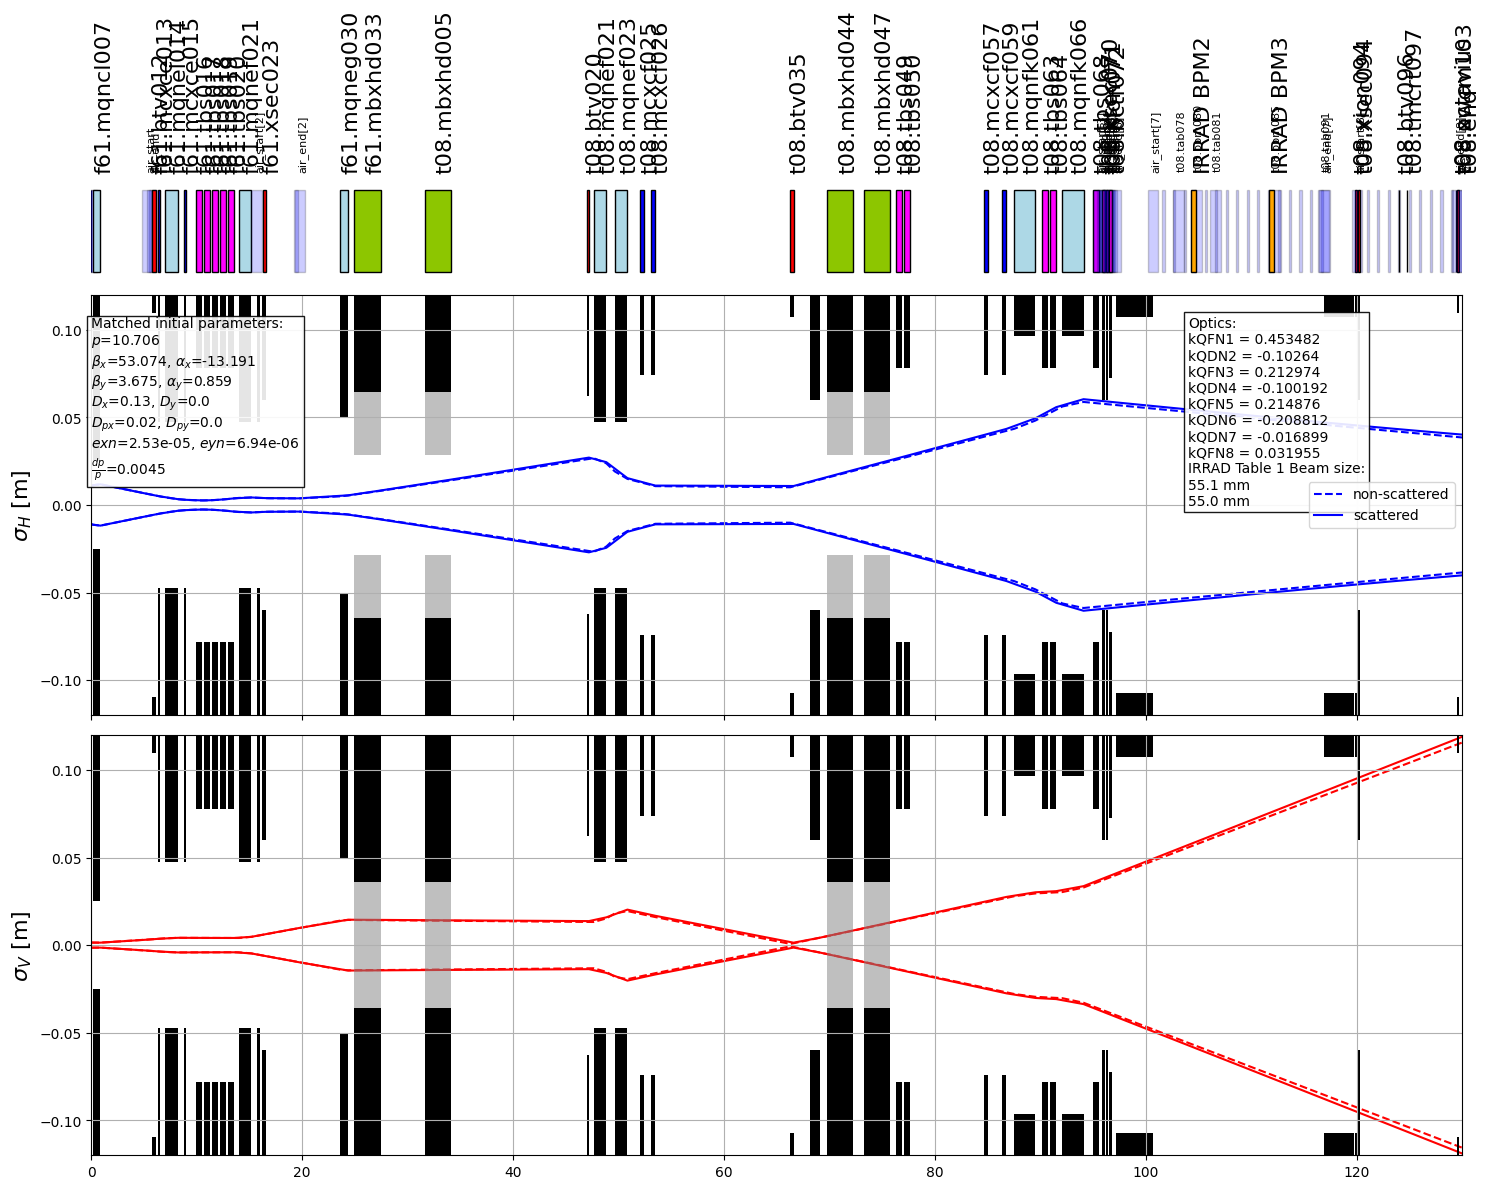

In [ ]:
with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

# Optics
optics = result.x
madx.input("kQFN1 = "+str(optics[0])+";")
madx.input("kQDN2 = "+str(-optics[1])+";")
madx.input("kQFN3 = "+str(optics[2])+";")
madx.input("kQDN4 = "+str(-optics[3])+";")
madx.input("kQFN5 = "+str(optics[4])+";")
madx.input("kQDN6 = "+str(-optics[5])+";")
madx.input("kQDN7 = "+str(-optics[6])+";")
madx.input("kQFN8 = "+str(optics[7])+";")

# Add the Air region
sequence = "f61t8_op"

p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

#t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


# add_hidden_marker(madx, sequence, 20, 100, steps)

madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
madx.use(sequence=sequence)

# make thin
madx.use(sequence="f61t8_op")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')
madx.use(sequence="f61t8_op")
madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
# madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")
madx.use(sequence="f61t8_op")


twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

# plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])


# Air scattering
madx.use(sequence=sequence)
madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p/charge, twiss, ex_initial, ey_initial)

fontsize=16
figsize=(15,12)
height_ratios=[1,3,3]
fig, ax = plt.subplots(3,1, figsize=figsize, tight_layout=True, sharex=True, height_ratios=height_ratios)
    
draw_synoptic(ax[0], twiss_scattered)

ax[1].plot(twiss['s'], beam_size(twiss['betx'], twiss['dx'], ex, sige, 1)+twiss.x, alpha=1.0, color ="b", zorder=0, ls="--", label="non-scattered")
ax[1].plot(twiss['s'], -beam_size(twiss['betx'], twiss['dx'], ex, sige, 1)+twiss.x, alpha=1.0, color ="b", zorder=0, ls="--")
ax[2].plot(twiss['s'], beam_size(twiss['bety'], twiss['dy'], ey, sige, 1)+twiss.y, alpha=1.0, color ="r", zorder=0, ls="--")
ax[2].plot(twiss['s'], -beam_size(twiss['bety'], twiss['dy'], ey, sige, 1)+twiss.y, alpha=1.0, color ="r", zorder=0, ls="--")

ax[1].plot(twiss_scattered['s'], beam_size(twiss_scattered['betx'], twiss_scattered['dx'], twiss_scattered['ex'], sige, 1)+twiss_scattered.x, alpha=1.0, color ="b", zorder=0, label="scattered")
ax[1].plot(twiss_scattered['s'], -beam_size(twiss_scattered['betx'], twiss_scattered['dx'], twiss_scattered['ex'], sige, 1)+twiss_scattered.x, alpha=1.0, color ="b", zorder=0)
ax[1].set_xlim(0,twiss_scattered.s[-1])

ax[1].legend()

ax[2].plot(twiss_scattered['s'], beam_size(twiss_scattered['bety'], twiss_scattered['dy'], twiss_scattered['ey'], sige, 1)+twiss_scattered.y, alpha=1.0, color ="r", zorder=0)
ax[2].plot(twiss_scattered['s'], -beam_size(twiss_scattered['bety'], twiss_scattered['dy'], twiss_scattered['ey'], sige, 1)+twiss_scattered.y, alpha=1.0, color ="r", zorder=0)
ax[2].set_xlim(0,twiss_scattered.s[-1])

ax[1].grid()
ax[1].set_ylim(-0.12, 0.12)
ax[1].set_ylabel(r"$\sigma_{H}$ [m]", fontsize=fontsize)

ax[2].grid()
ax[2].set_ylim(-0.12, 0.12)
ax[2].set_ylabel(r"$\sigma_{V}$ [m]", fontsize=fontsize)


draw_aperture_circle(ax[1], twiss_scattered, "aper_1")
draw_aperture_circle(ax[2], twiss_scattered, "aper_1")
draw_aperture_rectangle(ax[1], twiss_scattered, "aper_1")
draw_aperture_rectangle(ax[2], twiss_scattered, "aper_2")
draw_aperture_racetrackH(ax[1], twiss_scattered, "aper_1", "aper_2", "aper_3", "aper_4")
draw_aperture_racetrackV(ax[2], twiss_scattered, "aper_1", "aper_2", "aper_3", "aper_4")


# Box with initial parameters
textstr = '\n'.join((
    "Matched initial parameters:",
    r'$p$='+str(round(p/charge,3)),
    r'$\beta_{x}$='+str(round(betx0,3))+r', $\alpha_{x}$='+str(round(alfx0,3)),
    r'$\beta_{y}$='+str(round(bety0,3))+r', $\alpha_{y}$='+str(round(alfy0,3)),
    r'$D_{x}$='+str(round(dx0,3))+r', $D_{y}$='+str(round(dy0,3)),
    r'$D_{px}$='+str(round(dpx0,3))+r', $D_{py}$='+str(round(dpy0,3)),
    r'$exn$='+str(round(exn,8))+r', $eyn$='+str(round(eyn,8)),
    r'$\frac{dp}{p}$='+str(round(sige,6)),
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
ax[1].text(0., 0.95, textstr, transform=ax[1].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


x_beam_size = beam_size(twiss_scattered['betx'][instrument_focal_point], twiss_scattered['dx'][instrument_focal_point], twiss_scattered['ex'][instrument_focal_point], sige, 1)
y_beam_size = beam_size(twiss_scattered['bety'][instrument_focal_point], twiss_scattered['dy'][instrument_focal_point], twiss_scattered['ey'][instrument_focal_point], sige, 1)

print(f"{round(x_beam_size*1000, 4)} mm")
print(f"{round(y_beam_size*1000, 4)} mm")

# Box with optics
textstr = '\n'.join((
    "Optics:",
    "kQFN1 = "+str(round(optics[0],6)),
    "kQDN2 = "+str(round(-optics[1],6)),
    "kQFN3 = "+str(round(optics[2],6)),
    "kQDN4 = "+str(round(-optics[3],6)),
    "kQFN5 = "+str(round(optics[4],6)),
    "kQDN6 = "+str(round(-optics[5],6)),
    "kQDN7 = "+str(round(-optics[6],6)),
    "kQFN8 = "+str(round(optics[7],6)),
    "IRRAD Table 1 Beam size:",
    str(round(x_beam_size*1000, 1))+" mm",
    str(round(y_beam_size*1000, 1))+" mm",
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
ax[1].text(0.8, 0.95, textstr, transform=ax[1].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

# plot_graph(twiss, ex, sige, ey, figsize=(15,8))